In [59]:
import pandas as pd
import glob
import os
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Dataset description

Population of Barcelona according to the Municipal Register of Inhabitants on January 1 of each year.

# Columns description

01.Data_Referencia: Reference date of the data.

02.Codi_Districte: District code.

03.Nom_Districte: District name.

04.Codi_Barri: Neighbourhood code.

05.Nom_Barri: Neighbourhood name.

06.AEB: Basic statistical area.

07.Seccio_Censal: Census tract.

08.Valor: Number of inhabitants.

# Loading the data

In [24]:
# Path to the data folder
file_path = "../data/population"

# List of all CSV files in the folder
csv_files = glob.glob(os.path.join(file_path, "*.csv"))

# Read each CSV file into a DataFrame and store them in a list
dataframes = [pd.read_csv(file, dtype=object) for file in csv_files]

# Concatenate all DataFrames into one
population_df = pd.concat(dataframes, ignore_index=True)

population_df.head()

,Data_Referencia,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,AEB,Seccio_Censal,Valor
0,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,1309
1,2016-01-01,1,Ciutat Vella,1,el Raval,1,1002,1546
2,2016-01-01,1,Ciutat Vella,1,el Raval,2,1003,3420
3,2016-01-01,1,Ciutat Vella,1,el Raval,2,1004,2753
4,2016-01-01,1,Ciutat Vella,1,el Raval,3,1005,2481


In [43]:
# Filter to only keep rows from 2024
population_df = population_df[population_df["Data_Referencia"] == "2024-01-01"]
population_df.head()

,Data_Referencia,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,AEB,Seccio_Censal,Valor
8544,2024-01-01,1,Ciutat Vella,1,el Raval,1,1001,1309
8545,2024-01-01,1,Ciutat Vella,1,el Raval,1,1002,1282
8546,2024-01-01,1,Ciutat Vella,1,el Raval,2,1003,3500
8547,2024-01-01,1,Ciutat Vella,1,el Raval,2,1004,2999
8548,2024-01-01,1,Ciutat Vella,1,el Raval,3,1005,2326


In [44]:
population_df.dtypes

Data_Referencia    object
Codi_Districte     object
Nom_Districte      object
Codi_Barri         object
Nom_Barri          object
AEB                object
Seccio_Censal      object
Valor               int64
dtype: object

In [45]:
# Convert "Valor" column to integer
population_df = population_df.astype({"Valor": int})

population_df.dtypes

Data_Referencia    object
Codi_Districte     object
Nom_Districte      object
Codi_Barri         object
Nom_Barri          object
AEB                object
Seccio_Censal      object
Valor               int64
dtype: object

In [46]:
population_df.head()

,Data_Referencia,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,AEB,Seccio_Censal,Valor
8544,2024-01-01,1,Ciutat Vella,1,el Raval,1,1001,1309
8545,2024-01-01,1,Ciutat Vella,1,el Raval,1,1002,1282
8546,2024-01-01,1,Ciutat Vella,1,el Raval,2,1003,3500
8547,2024-01-01,1,Ciutat Vella,1,el Raval,2,1004,2999
8548,2024-01-01,1,Ciutat Vella,1,el Raval,3,1005,2326


# EDA

## Automatic EDA test

In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling

In [29]:
from ydata_profiling import ProfileReport

In [30]:
population_eda_report = ProfileReport(population_df)
population_eda_report.to_file("population_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 93.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Manual EDA

In [47]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 8544 to 9611
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_Referencia  1068 non-null   object
 1   Codi_Districte   1068 non-null   object
 2   Nom_Districte    1068 non-null   object
 3   Codi_Barri       1068 non-null   object
 4   Nom_Barri        1068 non-null   object
 5   AEB              1068 non-null   object
 6   Seccio_Censal    1068 non-null   object
 7   Valor            1068 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 75.1+ KB


### Summary statistics for population

In [48]:
# Quick summary of numeric columns
population_df.describe()

,Valor
count,1068.000000
mean,1594.395131
std,640.973965
min,789.000000
25%,1298.000000
50%,1515.500000
75%,1738.000000
max,13115.000000


### Missing values

In [49]:
population_df.isna().sum()

Data_Referencia    0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
AEB                0
Seccio_Censal      0
Valor              0
dtype: int64

In [62]:
# Count the number of unique values in the columns "Nom_Barri", "Nom_Districte" and "Seccio_Censal"
population_df[["Nom_Barri", "Nom_Districte", "Seccio_Censal"]].nunique()

Nom_Barri          73
Nom_Districte      10
Seccio_Censal    1068
dtype: int64

### Distribution of population

#### Census tract

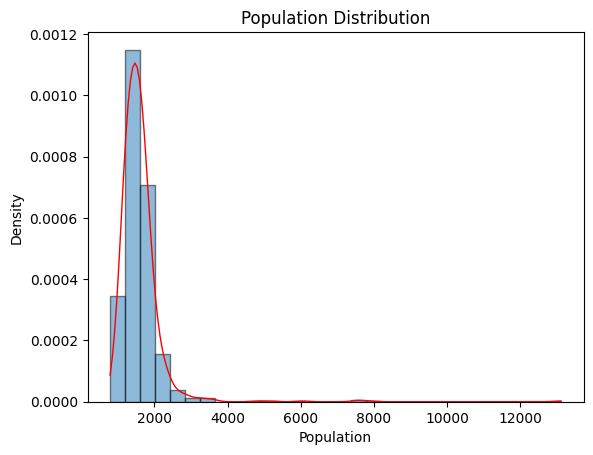

In [66]:
# Extract the numeric values
vals = population_df["Valor"].dropna().values

# 1) Calculate the kernel density estimate
kde = gaussian_kde(vals)

# 2) Generate a range of x values from min to max of the data
x_range = np.linspace(vals.min(), vals.max(), 200)

# 3) Evaluate the KDE over that range
kde_values = kde(x_range)

# 4) Plot the histogram and the KDE curve
plt.figure()
plt.hist(vals, bins=30, density=True, alpha=0.5, edgecolor='black')  
plt.plot(x_range, kde_values, linewidth=1, color="red")  
plt.xlabel("Population")
plt.ylabel("Density")
plt.title("Population Distribution")
plt.show()

#### District

In [37]:
mean_valor_by_district = population_df.groupby('Nom_Districte')['Valor'].mean().sort_values(ascending=False)
print(mean_valor_by_district)

Nom_Districte
Ciutat Vella           1958.574074
Sant Martí             1633.677249
Sant Andreu            1583.964912
Sants-Montjuïc         1583.118708
Eixample               1553.171484
Sarrià-Sant Gervasi    1528.845805
Nou Barris             1465.810066
Les Corts              1441.855750
Gràcia                 1411.835249
Horta-Guinardó         1404.723577
Name: Valor, dtype: float64


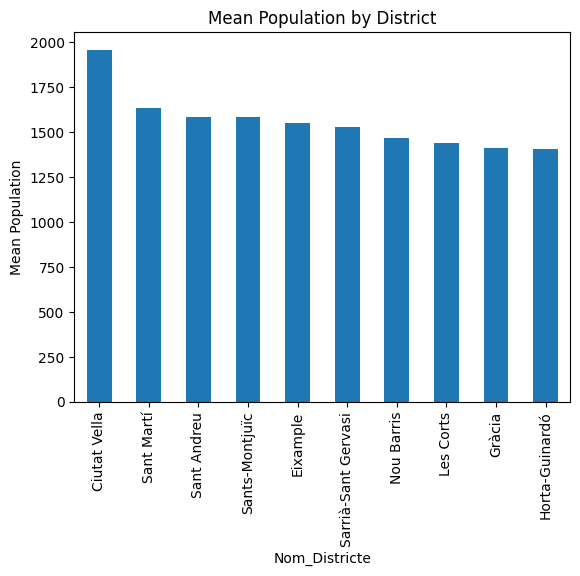

In [65]:
# Bar plot of average Valor per district
plt.figure()
mean_valor_by_district.plot(kind='bar')
plt.xlabel("Nom_Districte")
plt.ylabel("Mean Population")
plt.title("Mean Population by District")
plt.show()

<Figure size 640x480 with 0 Axes>

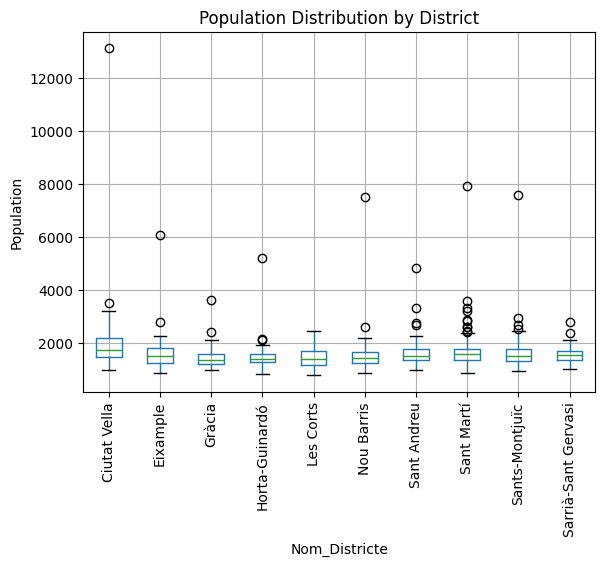

In [64]:
plt.figure()
population_df.boxplot(column='Valor', by='Nom_Districte', rot=90)
plt.title("Population Distribution by District")
plt.suptitle("")  # Remove the default Pandas title
plt.xlabel("Nom_Districte")
plt.ylabel("Population")
plt.show()